# Watershed Segmentation

Watershed segmentation is an image processing technique used in binary images to solve the problem of clustered or overlapped objects. It can be thought of as topographic surfaces, where high-density pixel values are hills and low-density pixel values are valleys. Now, imagine that every valley is filling with water, this way, the water level will be climbing, and the different valleys will be beginning to merge. The algorithm defines the watershed lines (barriers) that protect objects and prevent the merger. The filling process continues up to the top, and the watershed lines represent each object's edges [1].

<center>Binary image.</center>
<center><img src='images/pre_processing_example.png'></center>
<center>Samuel Sung [1].</center>

In the watershed, we need of three information: 

1) Sure background:

From the binary image, the objects are labeled with one and the background with zero, but in some images, the threshold can be imperfect. For this reason, the dilatation operation (Appendix A in the classical techniques) is used to cover more ground [1].

<center>Sure background.</center>
<center><img src='images/sure_background.png'></center>
<center>Samuel Sung [1].</center>

2) Sure foreground:

We can find the foreground with erosion (Appendix A in the classical techniques) or distance map. However, erosion can destroy essential information on small objects. So, the distance map is a good alternative to find the foreground of the image. In a brief explanation, every object (1 in a binary image) is reassigned to a value equal to the distance between it and the image background (0 in a binary image) [1].

The distance is calculated with the euclidian distance.

$$ d(p_{1}, p_{2}) = \sqrt{(x_{1} - x_{2})^{2} + (y_{1} - y_{2})^{2}} $$

<center>Distance Map</center>
<center><img src='images/distance_map_01.png'></center>
<center>Samuel Sung [1].</center>


3) Unsure region.

$$ unsure\ region = sure\ background - sure\ foreground $$

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

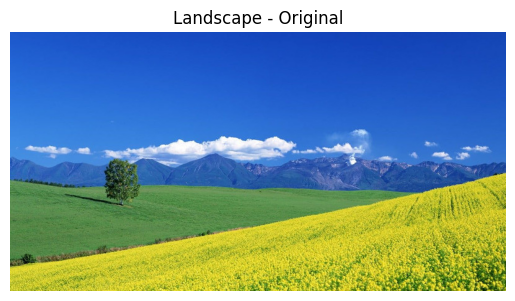

In [2]:
image = cv2.imread('images/landscape_02.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Landscape - Original')
plt.axis('off')

plt.show()

In [3]:
vectorized_image = image.reshape(-1, 3)
vectorized_image = np.float32(vectorized_image)

print(f'Image shape: {vectorized_image.shape}')

Image shape: (334400, 3)


In [4]:
CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

## Example - Two regions:

In [5]:
# ret: Sum of the squared distance from each point to its centers.
# labels: The labels of each pixel in the image.
# centers: Array with the centroids.
ret, label, centers = cv2.kmeans(vectorized_image, 2, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print(centers)

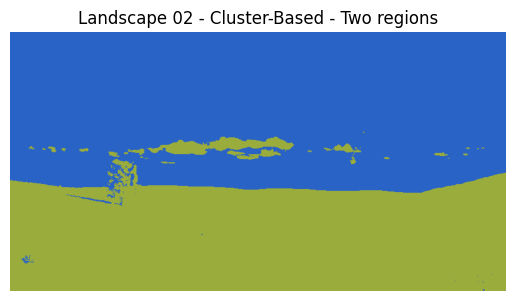

In [14]:
final_image = centers[label.flatten()]
final_image = final_image.reshape(image.shape)

plt.imshow(final_image)
plt.title('Landscape 02 - Cluster-Based - Two regions')
plt.axis('off')

plt.show()

## Example - Three regions:

In [15]:
# ret: Sum of the squared distance from each point to its centers.
# labels: The labels of each pixel in the image.
# centers: Array with the centroids.
ret, label, centers = cv2.kmeans(vectorized_image, 3, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print(centers)

[[203 203  62]
 [ 92 132  59]
 [ 42 100 199]]


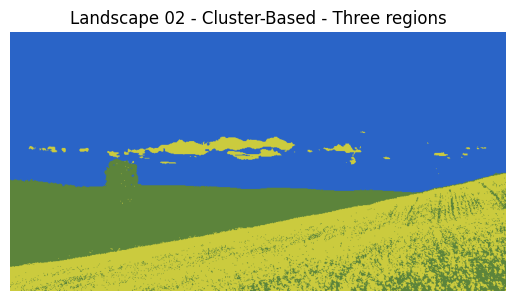

In [16]:
final_image = centers[label.flatten()]
final_image = final_image.reshape(image.shape)

plt.imshow(final_image)
plt.title('Landscape 02 - Cluster-Based - Three regions')
plt.axis('off')

plt.show()

## Example - Four regions:

In [19]:
# ret: Sum of the squared distance from each point to its centers.
# labels: The labels of each pixel in the image.
# centers: Array with the centroids.
ret, label, centers = cv2.kmeans(vectorized_image, 4, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print(centers)

[[ 90 132  61]
 [183 203 237]
 [ 39  97 199]
 [200 200  47]]


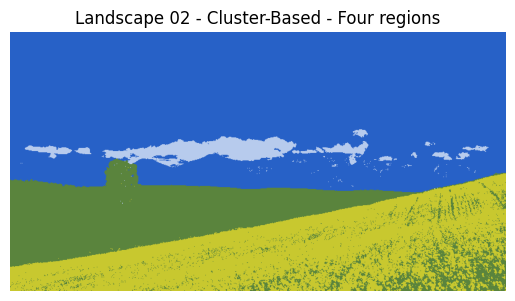

In [20]:
final_image = centers[label.flatten()]
final_image = final_image.reshape(image.shape)

plt.imshow(final_image)
plt.title('Landscape 02 - Cluster-Based - Four regions')
plt.axis('off')

plt.show()

## Example - Five regions:

In [21]:
# ret: Sum of the squared distance from each point to its centers.
# labels: The labels of each pixel in the image.
# centers: Array with the centroids.
ret, label, centers = cv2.kmeans(vectorized_image, 5, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print(centers)

[[ 31  85 189]
 [ 53 117 213]
 [ 90 132  60]
 [200 200  47]
 [191 208 239]]


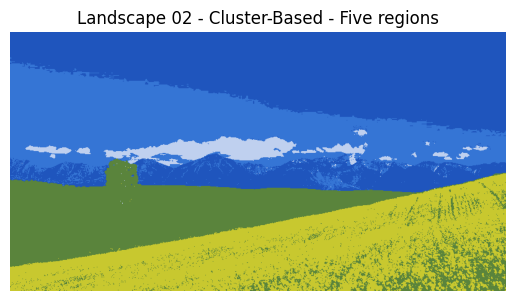

In [22]:
final_image = centers[label.flatten()]
final_image = final_image.reshape(image.shape)

plt.imshow(final_image)
plt.title('Landscape 02 - Cluster-Based - Five regions')
plt.axis('off')

plt.show()

## Example - Six regions:

In [24]:
# ret: Sum of the squared distance from each point to its centers.
# labels: The labels of each pixel in the image.
# centers: Array with the centroids.
ret, label, centers = cv2.kmeans(vectorized_image, 6, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print(centers)

[[ 85 130  66]
 [190 208 239]
 [ 30  84 189]
 [162 168  25]
 [ 51 116 212]
 [213 211  55]]


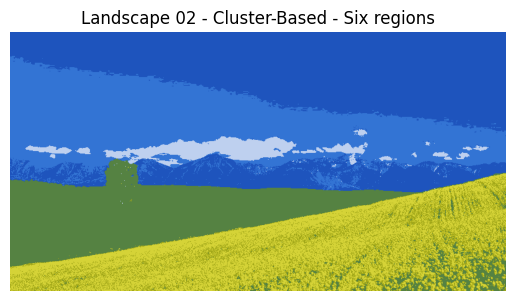

In [25]:
final_image = centers[label.flatten()]
final_image = final_image.reshape(image.shape)

plt.imshow(final_image)
plt.title('Landscape 02 - Cluster-Based - Six regions')
plt.axis('off')

plt.show()

## Example - Seven regions:

In [26]:
# ret: Sum of the squared distance from each point to its centers.
# labels: The labels of each pixel in the image.
# centers: Array with the centroids.
ret, label, centers = cv2.kmeans(vectorized_image, 7, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print(centers)

[[ 30  84 189]
 [159 166  23]
 [212 210  55]
 [191 208 239]
 [ 60  88  22]
 [ 89 138  75]
 [ 52 117 212]]


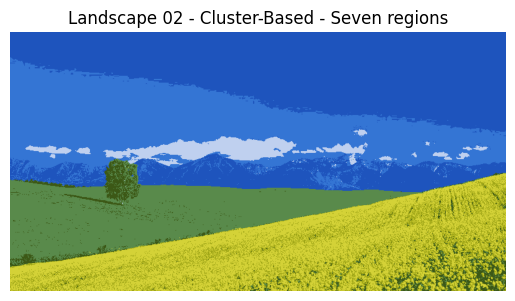

In [27]:
final_image = centers[label.flatten()]
final_image = final_image.reshape(image.shape)

plt.imshow(final_image)
plt.title('Landscape 02 - Cluster-Based - Seven regions')
plt.axis('off')

plt.show()

## References:

[1] Sung, S. (2021). Watershed Segmentation – detect individual objects when heavily clustered. Medium. https://medium.com/codex/watershed-segmentation-locate-individual-objects-when-heavily-clustered-b07bb1dbc0f6